## Polynomial Regression
A regression equation is a polynomial regression equation if the power of an independent variable is more than 1. The equation below represents a polynomial equation:
\begin{equation}
y=\ a+b\ast x+\ c\ast x²
\end{equation}
In this regression technique, the best fit line is not a straight line. It is rather a curve that fits into the data points.
This is still considered to be linear model as the coefficients/weights associated with the features are still linear. x² is only a feature. However the curve that we are fitting is quadratic in nature.

![](images/quadratic.png)

### Overfitting/Underfitting
* Common problems that prevent accurate predictions
* When creating a model, key goal is **making accurate predictions** for **data it has not yet seen** 
* **Underfitting** occurs when a **model is too simple to make predictions**, based on its training data
    * You may use a **linear model**, such as **simple linear regression**, when problem really requires a **non-linear model**
* **Overfitting** occurs when your **model is too complex**
    * **Most extreme case** would be a **model that memorizes its training data**
    * New data that **matches the training data** will produce **perfect predictions**, but the model will not know what to do with data it has never seen.
    
![](images/overfitting.png)

(see https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76)  
  
Especially look out for curve towards the ends and see whether those shapes and trends make sense. Higher polynomials can end up producing weird results on extrapolation.

### Case Global Warming
We will now investigate of a higher degree polynomial model fits better the Brussels winter temperature than a linear model. 


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/wintertempbrussels.xlsx'
brussels = pd.read_excel(url)
brussels.head()

,Year,Temperature
0,1834,5.4
1,1835,4.2
2,1836,2.0
3,1837,2.8
4,1838,-1.1


In [14]:
from sklearn.model_selection import train_test_split
X = brussels.drop('Temperature',axis=1)
y = brussels['Temperature']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [15]:
# Now we are using Polynomial Regression. 
# This is still LinearRegression because the coefficients/weights associated with the features are still linear
poly = PolynomialFeatures(degree=2)
# fit_transform will turn x**2 into a feaure
X_train_transform = poly.fit_transform(X_train)   
X_test_transform = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_transform,y_train)

#To retrieve the intercept:
print("Intercept")
print(model.intercept_)
print()
#For retrieving the coefficients:
print("Coefficients")
print(model.coef_)
print()

Intercept
162.54852970489443

Coefficients
[ 0.00000000e+00 -1.78486448e-01  4.95971814e-05]



In [16]:
y_predict = model.predict(X_test_transform)

MAE = metrics.mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: '+ str(MAE))
print()

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()

mean = brussels['Temperature'].mean()
print ('Mean: ' + str(mean))
print()

r2 = metrics.r2_score(y_test,y_predict)
print('R square: ' + str(r2))  
print()

Mean Absolute Error: 1.4291245632304352

Mean Squared Error: 3.040690942327554

Root Mean Squared Error: 1.7437577074604012

Mean: 2.7284946236559136

R square: -0.03916388267722226



The Mean Absolute Error and Root Mean Squared Error are smaller for Polynomial Regression of the second degree, which is in fact bad news for climate change...  

In [17]:
# Calculate the result of the polynomial for a specific value of x
def p(x):
    result = model.intercept_
    for i in range(0, len(model.coef_)):
        result += model.coef_[i] * x**i 
    return result

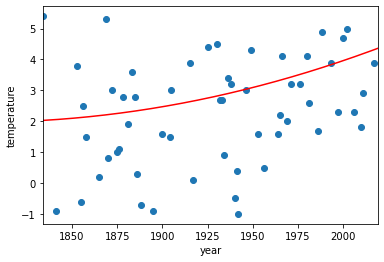

In [18]:
# Plot the dataset
plt.scatter(X_test, y_test)
xmin = brussels['Year'].min()
xmax = brussels['Year'].max()
plt.xlim([xmin, xmax])
plt.xlabel('year')
plt.ylabel('temperature')

# Plot the polynomial
t1 = np.arange(xmin, xmax, 0.01)
plt.plot(t1, p(t1), color='red')
plt.show()


We will now use a for loop to create a model voor polynomials of degree = 1 .. 5 and to write out the root mean squared error.

In [19]:
from sklearn.model_selection import train_test_split
X = brussels.drop('Temperature',axis=1)
y = brussels['Temperature']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_train_transform = poly.fit_transform(X_train)
    X_test_transform = poly.fit_transform(X_test)

    model = LinearRegression()
    model.fit(X_train_transform,y_train)
    
    y_predict = model.predict(X_test_transform)    
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
    print('Root Mean Squared Error for i (test set) = ' + str(i) + ' is '+ str(RMSE))
    print()
    
    y_predict = model.predict(X_train_transform)
    RMSE = np.sqrt(metrics.mean_squared_error(y_train,y_predict))
    print('Root Mean Squared Error for i (training set) = ' + str(i) + ' is '+ str(RMSE))
    print()   

Root Mean Squared Error for i (test set) = 1 is 1.6792491728402292

Root Mean Squared Error for i (training set) = 1 is 1.6274607486082815

Root Mean Squared Error for i (test set) = 2 is 1.6579951890388185

Root Mean Squared Error for i (training set) = 2 is 1.6214100836516399

Root Mean Squared Error for i (test set) = 3 is 1.6695299217903294

Root Mean Squared Error for i (training set) = 3 is 1.6170428308597287

Root Mean Squared Error for i (test set) = 4 is 1.6700552702359055

Root Mean Squared Error for i (training set) = 4 is 1.6167530117877327

Root Mean Squared Error for i (test set) = 5 is 1.670593847414687

Root Mean Squared Error for i (training set) = 5 is 1.6164627174172808



This is a clear example of overfitting: accuracy of the test set is getting better till degree 2. For higher degrees the accuracy is getting worse because of overfitting. This is confirmed by a better accuracy of the training set for higher degrees. 